In [ ]:
import pandas as pd

# Load datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [ ]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# Add 'Label' column
true_df["Label"] = "real"
fake_df["Label"] = "fake"

# Merge datasets
merged_df = pd.concat([true_df, fake_df], ignore_index=True)

In [ ]:
merged_df

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [ ]:
# Save merged dataset
merged_df.to_csv("merged_news.csv", index=False)

print("Datasets merged successfully. The output file is 'merged_news.csv'.")

Datasets merged successfully. The output file is 'merged_news.csv'.


In [ ]:
merged_df.isna().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation, then lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]

    # Join tokens back to string
    return ' '.join(processed_tokens)

# Apply preprocessing to 'text' column
merged_df['processed_text'] = merged_df['text'].apply(preprocess_text)

# Display first few rows to verify
merged_df[['text', 'processed_text']].head()

[nltk_data] Downloading package punkt to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ayan
[nltk_data]     Mondal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,processed_text
0,WASHINGTON (Reuters) - The head of a conservat...,washington reuters head conservative republica...
1,WASHINGTON (Reuters) - Transgender people will...,washington reuters transgender people allowed ...
2,WASHINGTON (Reuters) - The special counsel inv...,washington reuters special counsel investigati...
3,WASHINGTON (Reuters) - Trump campaign adviser ...,washington reuters trump campaign adviser geor...
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,seattlewashington reuters president donald tru...


In [ ]:
merged_df

,title,text,subject,date,Label,processed_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real,seattlewashington reuters president donald tru...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,st century wire say wire reported earlier week...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,st century wire say familiar theme whenever di...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,patrick henningsen st century wireremember oba...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,st century wire say al jazeera america go hist...


In [ ]:
# Save the preprocessed DataFrame
preprocessed_file_path = "preprocessed_data.csv"
merged_df.to_csv(preprocessed_file_path, index=False)

# Return the file path for download
preprocessed_file_path

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [1]:
import pandas as pd

preprocessed_data = pd.read_csv('preprocessed_data.csv', on_bad_lines='skip')

In [ ]:
preprocessed_data

,title,text,subject,date,Label,processed_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real,seattlewashington reuters president donald tru...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake,st century wire say wire reported earlier week...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake,st century wire say familiar theme whenever di...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake,patrick henningsen st century wireremember oba...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake,st century wire say al jazeera america go hist...


In [10]:
preprocessed_data.isna().sum()

,0
title,0
text,0
subject,0
date,0
Label,1
processed_text,1267


In [2]:
preprocessed_data = preprocessed_data.dropna(subset=['processed_text', 'Label'])


In [3]:
X = preprocessed_data['processed_text']
y = preprocessed_data['Label']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142857)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()  # No max_features, takes all words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
# Save the fitted vectorizer to a pickle file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ vectorizer.pkl has been saved successfully.")

✅ vectorizer.pkl has been saved successfully.


## Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB

#Uses the naive bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train) #doe the actual data fitting

MultinomialNB()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Get predictions
predictions = nb_model.predict(X_test_vectorized)

# Compute metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # Change to 'macro' or 'micro' if needed
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Print Scores
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report of Naive Bayes Classifier:\n", classification_report(y_test, predictions))


Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94

Classification Report of Naive Bayes Classifier:
               precision    recall  f1-score   support

        fake       0.95      0.93      0.94      4500
        real       0.93      0.95      0.94      4354

    accuracy                           0.94      8854
   macro avg       0.94      0.94      0.94      8854
weighted avg       0.94      0.94      0.94      8854



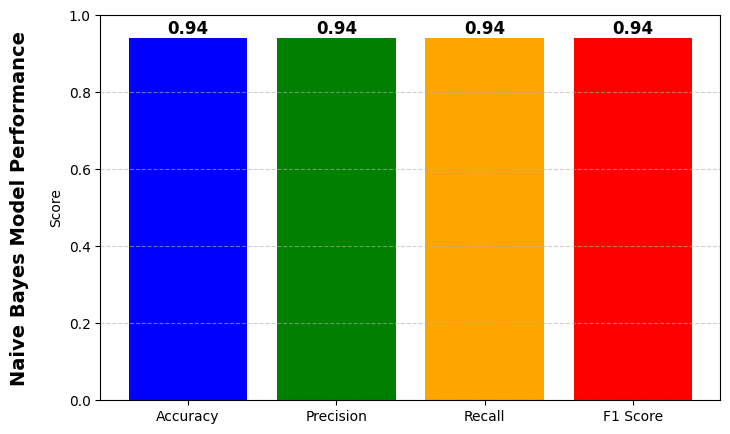

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Example scores
scores = [accuracy, precision, recall, f1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])

# Add score labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot
plt.ylim(0, 1)  # Ensure values are between 0 and 1
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate title vertically
plt.text(-1.2, 0.5, "Naive Bayes Model Performance", fontsize=14, fontweight='bold', rotation=90, va='center')

plt.show()


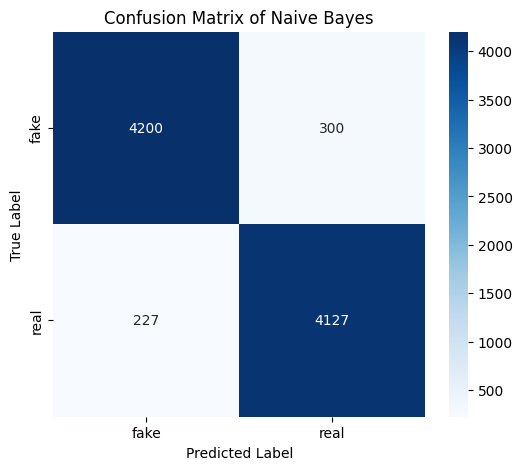

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Naive Bayes")
plt.show()


In [14]:
import pickle

# Save the model to a file
with open("naive_bayes_model.pkl", "wb") as file:
    pickle.dump(nb_model, file)

## Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # 50 trees in the forest
rf_model.fit(X_train_vectorized, y_train)  # Train the model

RandomForestClassifier(n_estimators=50, random_state=42)

In [17]:
predictions = rf_model.predict(X_test_vectorized) #stores alll of the predictions into a variable

# Print Scores
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # Change to 'macro' or 'micro' if needed
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report of Random Forest:\n", classification_report(y_test, predictions))

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99

Classification Report of Random Forest:
               precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4500
        real       0.99      0.99      0.99      4354

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



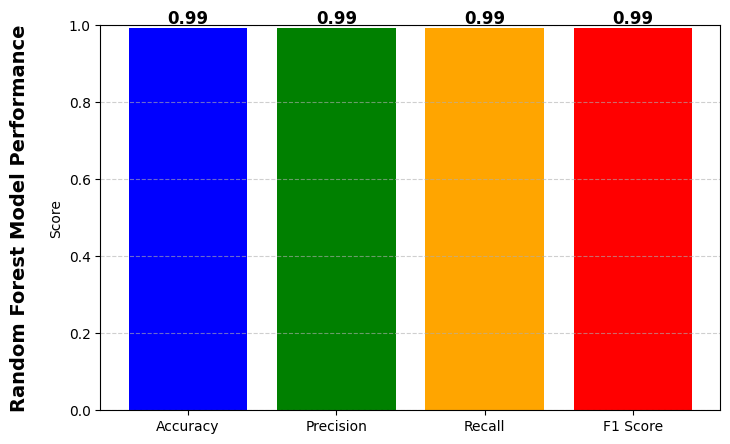

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Example scores
scores = [accuracy, precision, recall, f1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])

# Add score labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize plot
plt.ylim(0, 1)  # Ensure values are between 0 and 1
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Rotate title vertically
plt.text(-1.2, 0.5, "Random Forest Model Performance", fontsize=14, fontweight='bold', rotation=90, va='center')

plt.show()


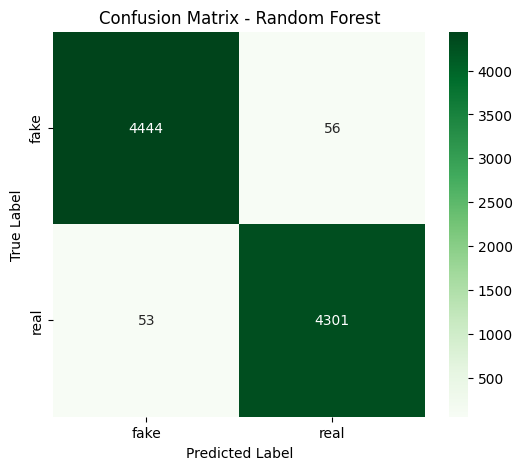

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [19]:
import pickle

# Save the model to a file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

### LSTM Model

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [19]:
pip install numpy scipy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [9]:
from gensim.models import Word2Vec

In [10]:
# Tokenize sentences for Word2Vec training
sentences = [text.split() for text in preprocessed_data['processed_text']]

In [11]:
word2vec_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,             # Smaller window
    min_count=2,          # Capture more vocabulary
    workers=4,            # Adjust based on CPU
    sg=1,                 # Keep Skip-Gram if needed
    epochs=10             # Optional: set explicit epochs
)

In [12]:
# Split data **BEFORE** tokenization to prevent leakage
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    preprocessed_data['processed_text'],
    preprocessed_data['Label'].map({'real': 1, 'fake': 0}).values,
    test_size=0.25, random_state=42
)

Tokenization

In [13]:
# Tokenization (Fitted ONLY on Training Data)
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(X_train_texts)  # ✅ Fit only on training data

X_train_sequences = tokenizer.texts_to_sequences(X_train_texts)
X_test_sequences = tokenizer.texts_to_sequences(X_test_texts)

X_train_padded = pad_sequences(X_train_sequences, maxlen=200)
X_test_padded = pad_sequences(X_test_sequences, maxlen=200)

In [16]:
# Create Embedding Matrix
embedding_matrix = np.zeros((15000, 100))
for word, i in tokenizer.word_index.items():
    if i < 15000 and word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [17]:
# Compute Class Weights (For Imbalanced Data)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

 LSTM Model

In [18]:
#  Build Improved LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=15000, output_dim=100, weights=[embedding_matrix], input_length=200, trainable=False),
    LSTM(64, dropout=0.4, recurrent_dropout=0.4, return_sequences=True),  # Reduced units + Increased dropout
    LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🟡 Step 7: Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

lstm_model.summary()  # Print model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,500,000 (5.72 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,500,000 (5.72 MB)

In [20]:
# Train Model with Class Weights
history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weights,  # ✅ Handles class imbalance
    callbacks=[early_stopping]
)

Epoch 1/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 235s 534ms/step - accuracy: 0.8234 - loss: 0.5841 - val_accuracy: 0.9544 - val_loss: 0.1718
Epoch 2/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 258s 526ms/step - accuracy: 0.9237 - loss: 0.2301 - val_accuracy: 0.9529 - val_loss: 0.1438
Epoch 3/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 227s 547ms/step - accuracy: 0.9363 - loss: 0.1857 - val_accuracy: 0.9678 - val_loss: 0.0998
Epoch 4/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 262s 547ms/step - accuracy: 0.9421 - loss: 0.1686 - val_accuracy: 0.9706 - val_loss: 0.0913
Epoch 5/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 253s 526ms/step - accuracy: 0.9528 - loss: 0.1412 - val_accuracy: 0.9767 - val_loss: 0.0754
Epoch 6/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 271s 549ms/step - accuracy: 0.9610 - loss: 0.1316 - val_accuracy: 0.9774 - val_loss: 0.0725
Epoch 7/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 261s 547ms/step - accuracy: 0.9629 - loss: 0.1173 - val_accuracy: 0.9825 - val_loss: 0.0611
Epoch 8/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 253s 526ms/step - accuracy: 0.9716 -

In [21]:
# 🔵 Step 9: Evaluate on Test Set
test_loss, test_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

346/346 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.9856 - loss: 0.0484
Test Accuracy: 0.9845
Test Loss: 0.0515


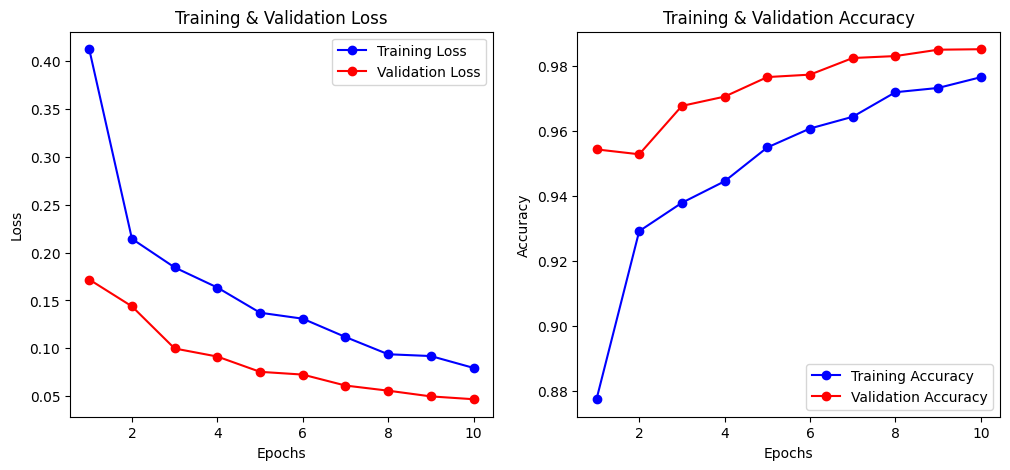

In [22]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# 🔵 Plot Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# 🟢 Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()


In [23]:
# Save model
lstm_model.save("lstm_model.h5")
